# Learning Rate比較

* 結論=0.0008以上直接飛出去
* 5種learning rate比較 -> lr = np.array([0.00008, 0.00006, 0.00003, 0.00001, 0.000001])
* update從100~1900次 -> _iter = np.array([100*i for i in range(1, 20)])

In [1]:
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

floatX = theano.config.floatX
print floatX

lr = np.array([0.00008, 0.00006, 0.00003, 0.00001, 0.000001]) #0.0008以上直接飛出去
errs_by_learningRate = pd.DataFrame()

for l in range(0, len(lr)):

    #theano variables
    x = T.vector()
    
    #theano shared variables (global variables)
    #w = theano.shared(np.array(np.ones(2), dtype=floatX), name='w')
    #b = theano.shared(np.array(np.ones(2), dtype=floatX), name='b')
    w = theano.shared(np.array([-1. for i in range(100)], dtype=floatX), name='w')
    b = theano.shared(np.array([-1. for i in range(100)], dtype=floatX), name='b')

    # define function
    y = w*x**2 + b
    f = theano.function([x], y)
    
    # define gradient desecent
    y_hat = T.vector()
    cost = T.sum((y-y_hat)**2)
    dw, db = T.grad(cost, [w,b])
    
    gradient = theano.function(inputs=[x, y_hat],
                               outputs=[dw, db],
                               updates=[(w, w-lr[l]*T.sum(dw)), (b, b-lr[l]*T.sum(db))])
    
    x_data = np.array(np.linspace(-5.0, 5.0, 100), dtype=floatX)
    y_data = np.array(x_data**2+1, dtype=floatX)
    
    _iter = np.array([100*i for i in range(1, 20)])
    errs = np.array([])
        
    for i in range(0, len(_iter)):
        for j in range(0, _iter[i]):
            gradient(x_data, y_data)        
        #print "w=%f, b=%f" % (w.get_value()[0], b.get_value()[0])    
        # define test
        cost_f = theano.function([x, y_hat], cost)
        err = cost_f(x_data, y_data)
        #print "t=%d, error=%f" % (_iter[i], err)   
        errs = np.append(errs, err)
        
    errs_by_learningRate[str(lr[l])] = errs
                         
errs_by_learningRate.plot() #飛出去了
errs_by_learningRate.plot(logy='True')

errs_by_learningRate.ix[:, 1:].plot() #拿掉0.00008
errs_by_learningRate.ix[:, 1:].plot(logy='True')

#ref
#http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2016/Lecture/Gradient%20Descent%20(v2).pdf

float64


### 0.00008的結果飛出去了
* X軸為每次update，100, 200, 300...，cost/loss/error結果

[<matplotlib.text.Text at 0xf2ce320>, <matplotlib.text.Text at 0xf3637f0>]

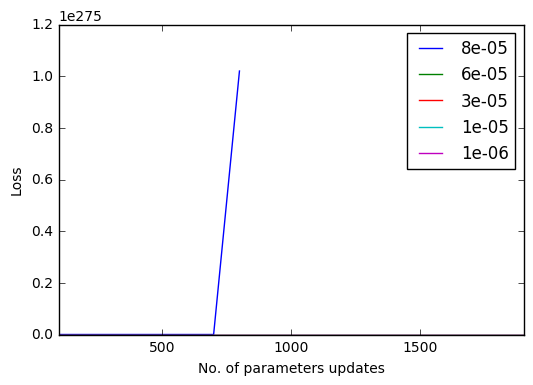

In [16]:
ax = errs_by_learningRate.plot(x=_iter)
ax.set(xlabel="No. of parameters updates", ylabel="Loss")

### 對y軸取log後，可以看得更清楚，0.00008藍色那條線飛出去了

[<matplotlib.text.Text at 0xf8c89e8>, <matplotlib.text.Text at 0xfa5d400>]

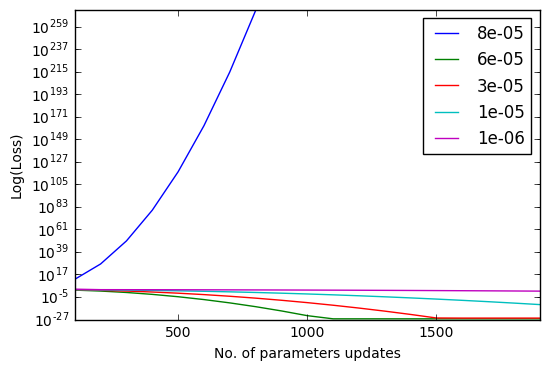

In [18]:
ax = errs_by_learningRate.plot(x=_iter, logy='True')
ax.set(xlabel="No. of parameters updates", ylabel="Log(Loss)")

### 拿掉0.0008再重新畫一次圖，可以發現0.00006的結果收斂最快

[<matplotlib.text.Text at 0xfd36fd0>, <matplotlib.text.Text at 0xfd0e668>]

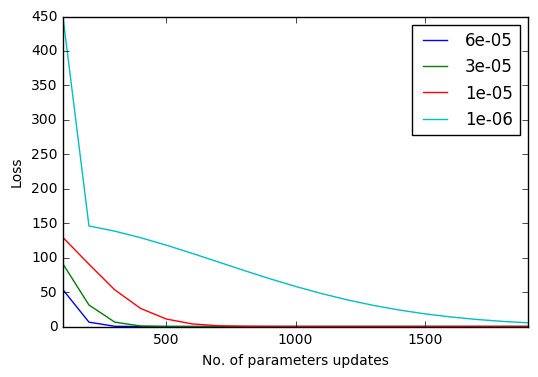

In [19]:
ax = errs_by_learningRate.ix[:, 1:].plot(x=_iter) #拿掉0.00008
ax.set(xlabel="No. of parameters updates", ylabel="Loss")

### 對y軸取log後，可以看得更清楚，0.00006那條線已經收斂

[<matplotlib.text.Text at 0x10723198>, <matplotlib.text.Text at 0xfd36828>]

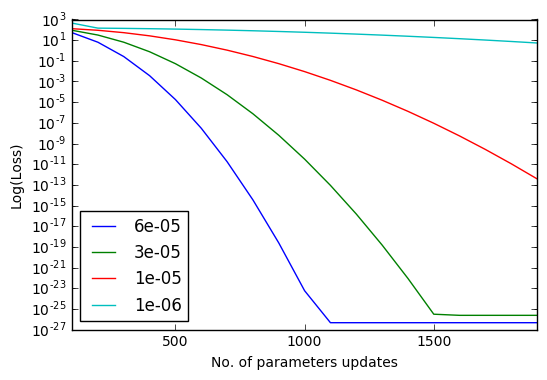

In [20]:
ax = errs_by_learningRate.ix[:, 1:].plot(x=_iter, logy='True') #拿掉0.00008
ax.set(xlabel="No. of parameters updates", ylabel="Log(Loss)")

### 單獨把0.00001拿出來畫，可以發現error還有往下降的空間

[<matplotlib.text.Text at 0x11543be0>, <matplotlib.text.Text at 0x11545898>]

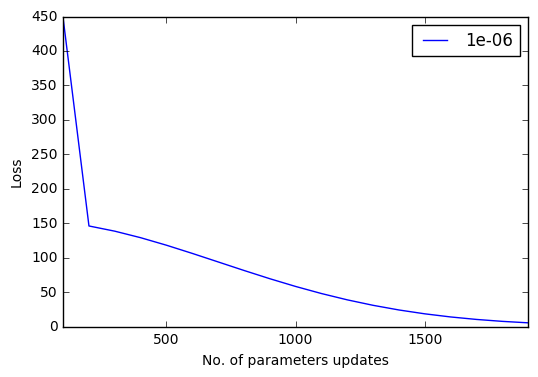

In [28]:
ax = errs_by_learningRate.ix[:, 4:].plot(x=_iter)
ax.set(xlabel="No. of parameters updates", ylabel="Loss")

In [10]:
errs_by_learningRate

,8e-05,6e-05,3e-05,1e-05,1e-06
0,1.896860e+12,5.305759e+01,9.042040e+01,1.289051e+02,447.518905
1,1.955276e+27,6.308162e+00,3.122191e+01,9.046299e+01,145.925548
2,6.470940e+49,2.586043e-01,6.335038e+00,5.318291e+01,138.372072
3,6.875638e+79,3.655497e-03,7.553277e-01,2.619229e+01,128.914225
4,2.345552e+117,1.781700e-05,5.291980e-02,1.080626e+01,117.995744
5,2.568997e+162,2.994336e-08,2.178701e-03,3.734888e+00,106.107221
6,9.033759e+214,1.735178e-11,5.270763e-05,1.081385e+00,93.742524
7,1.019905e+275,3.467092e-15,7.492832e-07,2.622908e-01,81.365714
8,inf,2.388702e-19,6.259145e-09,5.329500e-02,69.384001
9,inf,5.664528e-24,3.072420e-11,9.071731e-03,58.128664
